<a href="https://colab.research.google.com/github/23f1002944/23f1002944/blob/main/Geometric_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
bankfull=pd.read_csv("./sample_data/bank-full.csv",sep=";")
bankfull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
bankfull.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Let's model the number of calls taken to convert a client as a geometric distribution and see if that matches with our empirical distribution

Estimated parameter 'p' for geometric distribution: 0.4671


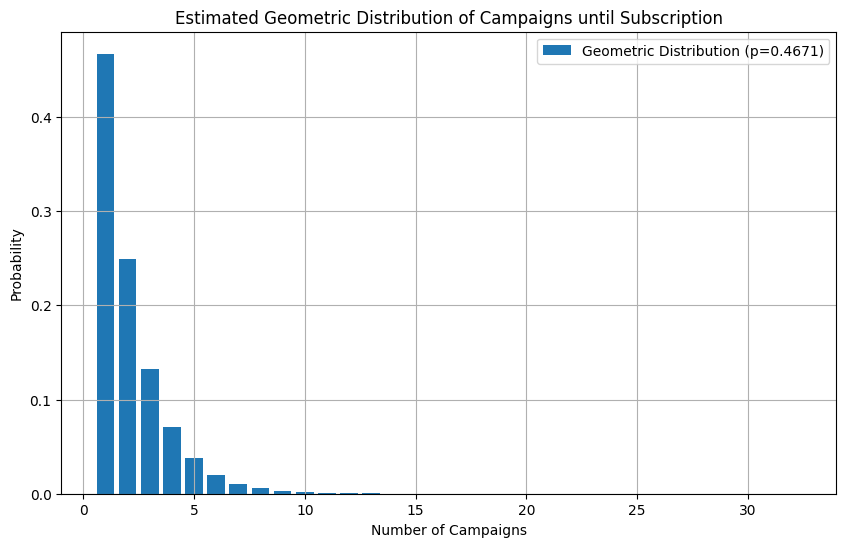

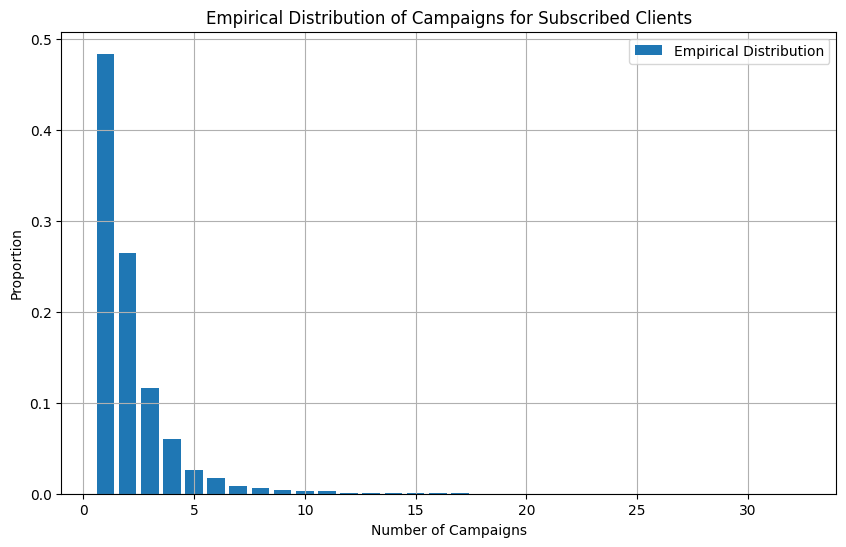

In [14]:
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to include only clients who subscribed ('yes')
subscribed_clients = bankfull[bankfull['y'] == 'yes']

# Get the campaign values for subscribed clients
campaign_data = subscribed_clients['campaign']

# Calculate the maximum number of campaigns for plotting
max_campaign = campaign_data.max()

# Calculate the mean of the campaign data for subscribed clients
mean_campaign = campaign_data.mean()

# The parameter 'p' for the geometric distribution is 1 / mean
p_estimate = 1 / mean_campaign
print(f"Estimated parameter 'p' for geometric distribution: {p_estimate:.4f}")

# Create a geometric distribution with the estimated parameter
geometric_dist = geom(p_estimate)

# Generate values for the x-axis (number of campaigns)
x = np.arange(1, max_campaign + 1)

# Calculate the probability mass function (PMF) for each x value
pmf_values = geometric_dist.pmf(x)

# Plot the estimated geometric distribution
plt.figure(figsize=(10, 6))
plt.bar(x, pmf_values, label=f'Geometric Distribution (p={p_estimate:.4f})')
plt.xlabel('Number of Campaigns')
plt.ylabel('Probability')
plt.title('Estimated Geometric Distribution of Campaigns until Subscription')
plt.legend()
plt.grid(True)
plt.show()

# You can also compare this to the empirical distribution of campaigns for subscribed clients
campaign_counts = campaign_data.value_counts(normalize=True).sort_index()

plt.figure(figsize=(10, 6))
plt.bar(campaign_counts.index, campaign_counts.values, label='Empirical Distribution')
plt.xlabel('Number of Campaigns')
plt.ylabel('Proportion')
plt.title('Empirical Distribution of Campaigns for Subscribed Clients')
plt.legend()
plt.grid(True)
plt.show()

Validated, the given dataset, models Geometric Distribution